In [14]:
from qiskit import *

def Deutsch_Jozsa_Oracle(n, qreg, circuit, oracle_type):
    if oracle_type == 1: # constant-0
        circuit.id(qreg[n])
    if oracle_type == 2: # constant-1
        circuit.x(qreg[n])
    if oracle_type == 3: # balanced-0
        circuit.cx(qreg[0], qreg[n])
    if oracle_type == 4: # balanced-1
        for i in range(n):
            circuit.cx(qreg[i], qreg[n])
n=3
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
#for i in range(n):
#    circuit.id(q[i])
circuit.x(q[n])
circuit.h(q)
circuit.barrier()

oracle_type = 1
Deutsch_Jozsa_Oracle(n,q,circuit, oracle_type)
circuit.barrier()
circuit.h(q)
for i in range(n):
    circuit.measure(q[i], c[i])
circuit.draw()

┌───┐      ░       ░ ┌───┐┌─┐      
q121_0: ┤ H ├──────░───────░─┤ H ├┤M├──────
        ├───┤      ░       ░ ├───┤└╥┘┌─┐   
q121_1: ┤ H ├──────░───────░─┤ H ├─╫─┤M├───
        ├───┤      ░       ░ ├───┤ ║ └╥┘┌─┐
q121_2: ┤ H ├──────░───────░─┤ H ├─╫──╫─┤M├
        ├───┤┌───┐ ░ ┌───┐ ░ ├───┤ ║  ║ └╥┘
q121_3: ┤ X ├┤ H ├─░─┤ I ├─░─┤ H ├─╫──╫──╫─
        └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║  ║ 
  c6: 3/═══════════════════════════╩══╩══╩═
                                   0  1  2

measurement = 0
f is constant


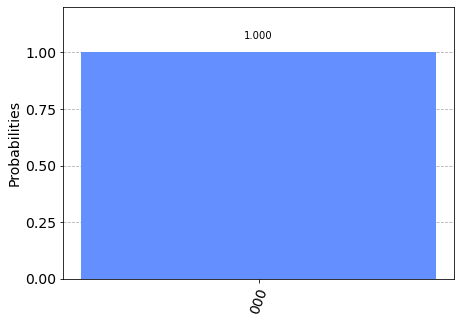

In [15]:
simulator=Aer.get_backend('qasm_simulator')
job=execute(circuit, simulator, shots=1)
result=job.result()
counts=result.get_counts()
measurement=int(list(counts.keys())[0], 2)
print('measurement = {}'.format(measurement))
if measurement == 0:
    print('f is constant')
else:
    print('f is balanced')
    
from qiskit.visualization import plot_histogram
plot_histogram(counts)